In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sn
import scipy.io as sio
import os

from google.colab import drive

In [ ]:
!pip install unrar

import os

# Set the path to your RAR file
rar_file_path = "/content/CSI_Data_27122023.rar"

# Set the destination folder for extraction
extract_folder = "/content/extracted_data"

# Create the destination folder if it doesn't exist
os.makedirs(extract_folder, exist_ok=True)

# Use unrar to extract the RAR file
!unrar x "$rar_file_path" "$extract_folder"



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/CSI_Data_27122023.rar

Creating    /content/extracted_data/CSI_Data_27122023                 OK
Creating    /content/extracted_data/CSI_Data_27122023/Horizontal      OK
Extracting  /content/extracted_data/CSI_Data_27122023/Horizontal/noPeople.csv       2%  OK 
Extracting  /content/extracted_data/CSI_Data_27122023/Horizontal/Q1_01.csv       5%  OK 
Extracting  /content/extracted_data/CSI_Data_27122023/Horizontal/Q1_02.csv       9%  OK 
Extracting  /content/extracted_data/CSI_Data_27122023/Horizontal/Q1_03.csv      11%  OK 
Extracting  /content/extracted_data/CSI_Data_27122023/Horizontal/Q1_04.csv      13%  OK 
Extracting  /content/extracted_data/CSI_Data_27122023/Horizontal/Q2_01.csv      16%  OK 
Extracting  /content/extracted_data/CSI_Data_27122023/Horizontal/Q2_02.csv      18%  OK 
Extracting  /content/extracted_data/CSI_D

In [ ]:
## Baseline (No-human) ##
# filename = "./drive/MyDrive/CSI_Data_27122023/Horizontal/Q1_01.csv"
filename = "/content/extracted_data/CSI_Data_27122023/Vertical/Q1_01.csv"

data = pd.read_csv(filename,header=None)
# Extract the 26th column
df = data.iloc[:, 25]

csi_data = []

for i in range(1,min(2000, len(df))):
    # Remove square brackets and split the string
    str1 = df[i].replace("[", "").replace("]", "")
    List = str1.split(" ")
    del List[-1]
    csi_values = [float(val) for val in List]

    # Append the list of CSI values to the csi_data list
    csi_data.append(csi_values)

# Convert csi_data to a NumPy array and then to a DataFrame
csi_data = np.array(csi_data).T.tolist()
csi_data = pd.DataFrame(csi_data)

# Display the first few rows of the DataFrame
print(csi_data)


     0      1     2      3      4      5      6     7      8      9     ...  \
0    34.0 -125.0  30.0  107.0  107.0  107.0  113.0  11.0 -125.0 -121.0  ...   
1    32.0   48.0 -32.0  -79.0  -79.0  -79.0   17.0 -79.0   48.0  112.0  ...   
2     2.0    8.0   1.0   22.0   22.0   22.0   23.0  16.0    8.0    8.0  ...   
3     0.0    0.0   0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0  ...   
4     0.0    0.0   0.0  -14.0  -10.0   -2.0   -1.0  -4.0    0.0    0.0  ...   
..    ...    ...   ...    ...    ...    ...    ...   ...    ...    ...  ...   
123   0.0    0.0   0.0   34.0   18.0    0.0    5.0  -7.0    0.0    0.0  ...   
124   0.0    0.0   0.0  -13.0  -13.0  -13.0  -13.0 -17.0    0.0    0.0  ...   
125   0.0    0.0   0.0   25.0   16.0    1.0    5.0  -2.0    0.0    0.0  ...   
126   0.0    0.0   0.0   -7.0   -8.0   -9.0  -10.0 -12.0    0.0    0.0  ...   
127   0.0    0.0   0.0   26.0   16.0    2.0    6.0   1.0    0.0    0.0  ...   

      1989   1990   1991   1992   1993   1994   199

In [ ]:
output_list = []

In [ ]:
quartile = "Q1"
section = "01"
sampling_range = 20

output_list = []

for r in range(1, 2):
    # file_dir = "./drive/MyDrive/CSI_Data_27122023/Horizontal/"
    file_dir = "/content/extracted_data/CSI_Data_27122023/Vertical/"
    name = quartile + "_" + section
    csv = ".csv"
    name_csv = name + csv
    file_name = os.path.join(file_dir, name_csv)

    # Read CSI data from the current file
    data_walk = pd.read_csv(file_name, header=None, encoding='utf-8')
    df_walk = data_walk.iloc[:, 25]
    df_walk = [item for item in df_walk if not(pd.isnull(item)) == True]
    df_walk.pop(0)
    print("df_walk\n",df_walk)
    csi_data_walk = []
    for i in range(len(df_walk)):
        str1 = df_walk[i].replace("[","")
        str2 = str1.replace("]","")
        list = str2.split(" ")
        # print(list)
        del list[-1]
        del list[-1]
        csi_data_walk.append([float(j) for j in list])
    csi_data_walk = np.array(csi_data_walk).T.tolist()
    print(csi_data_walk)
    csi_data_walk = pd.DataFrame(csi_data_walk)


df_walk
 ['[34 32 2 0 0 0 0 0 0 0 0 0 -8 -32 -9 -33 -10 -34 -10 -34 -10 -36 -9 -35 -10 -37 -11 -36 -9 -38 -8 -39 -7 -40 -6 -41 -6 -39 -5 -39 -4 -37 -6 -39 -4 -36 -2 -36 -2 -34 -3 -33 -1 -32 -2 -31 -1 -28 -3 -28 -3 -28 -3 -25 0 0 -2 -23 -4 -21 -4 -19 -4 -19 -4 -17 -5 -17 -4 -15 -5 -14 -5 -11 -6 -10 -6 -9 -6 -7 -7 -7 -7 -5 -7 -4 -7 -3 -7 -3 -7 -2 -7 -1 -5 -1 -5 0 -4 1 -2 3 -2 3 -1 5 -1 6 0 0 0 0 0 0 0 0 0 0 ]', '[-125 48 8 0 0 0 0 0 0 0 0 0 -16 23 -17 24 -16 25 -16 25 -16 26 -18 26 -18 27 -19 27 -18 27 -21 28 -20 28 -22 27 -21 26 -22 26 -22 24 -22 25 -21 23 -21 22 -21 20 -20 20 -19 19 -18 19 -18 17 -17 18 -16 17 -14 16 0 0 -13 14 -12 15 -11 14 -11 13 -9 12 -8 12 -7 11 -6 10 -5 10 -4 9 -3 9 -3 8 0 8 1 7 0 6 1 6 2 5 2 5 3 4 2 3 2 2 3 1 1 0 3 -1 3 -2 3 -5 0 0 0 0 0 0 0 0 0 0 ]', '[30 -32 1 0 0 0 0 0 0 0 0 0 25 12 27 12 28 12 28 12 28 14 28 15 29 14 28 15 28 15 28 16 29 17 28 16 29 17 27 16 27 16 28 15 25 15 24 16 25 15 24 13 23 13 22 13 20 12 21 12 20 12 19 11 0 0 16 10 15 7 15 6 13 6 12 5 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import time

start_time = time.time()

sampling_range = 20
output = []
for k in range(126):
    subcarrier = []
    for i in range(0, 2000, sampling_range):
        temp_data = []
        for j in range(i, i + sampling_range):
            temp_data.append(math.pow(csi_data_walk[j][k] - csi_data.mean(axis=1)[k], 2))
        subcarrier.append(math.sqrt(sum(temp_data) / sampling_range))
    output.append(subcarrier)
output_list.append(output)
sd_output = pd.DataFrame(output)

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")

Execution Time: 209.23375940322876 seconds


In [ ]:
sd_output

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,102.909430,0.631816,0.631816,0.631816,0.631816,0.631816,0.631816,0.631816,0.631816,0.631816,...,0.631816,0.631816,0.631816,0.631816,0.631816,0.631816,0.631816,0.631816,0.631816,0.631816
1,100.521116,0.693847,0.693847,0.693847,0.693847,0.693847,0.693847,0.693847,0.693847,0.693847,...,0.693847,0.693847,0.693847,0.693847,0.693847,0.693847,0.693847,0.693847,0.693847,0.693847
2,8.078125,0.035018,0.035018,0.035018,0.035018,0.035018,0.035018,0.035018,0.035018,0.035018,...,0.035018,0.035018,0.035018,0.035018,0.035018,0.035018,0.035018,0.035018,0.035018,0.035018
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3.975194,0.015508,0.015508,0.015508,0.015508,0.015508,0.015508,0.015508,0.015508,0.015508,...,0.015508,0.015508,0.015508,0.015508,0.015508,0.015508,0.015508,0.015508,0.015508,0.015508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,8.191681,0.022011,0.022011,0.022011,0.022011,0.022011,0.022011,0.022011,0.022011,0.022011,...,0.022011,0.022011,0.022011,0.022011,0.022011,0.022011,0.022011,0.022011,0.022011,0.022011
122,7.662408,0.038019,0.038019,0.038019,0.038019,0.038019,0.038019,0.038019,0.038019,0.038019,...,0.038019,0.038019,0.038019,0.038019,0.038019,0.038019,0.038019,0.038019,0.038019,0.038019
123,8.807699,0.025013,0.025013,0.025013,0.025013,0.025013,0.025013,0.025013,0.025013,0.025013,...,0.025013,0.025013,0.025013,0.025013,0.025013,0.025013,0.025013,0.025013,0.025013,0.025013
124,6.929143,0.034517,0.034517,0.034517,0.034517,0.034517,0.034517,0.034517,0.034517,0.034517,...,0.034517,0.034517,0.034517,0.034517,0.034517,0.034517,0.034517,0.034517,0.034517,0.034517


In [ ]:
sd_output.shape

(126, 100)

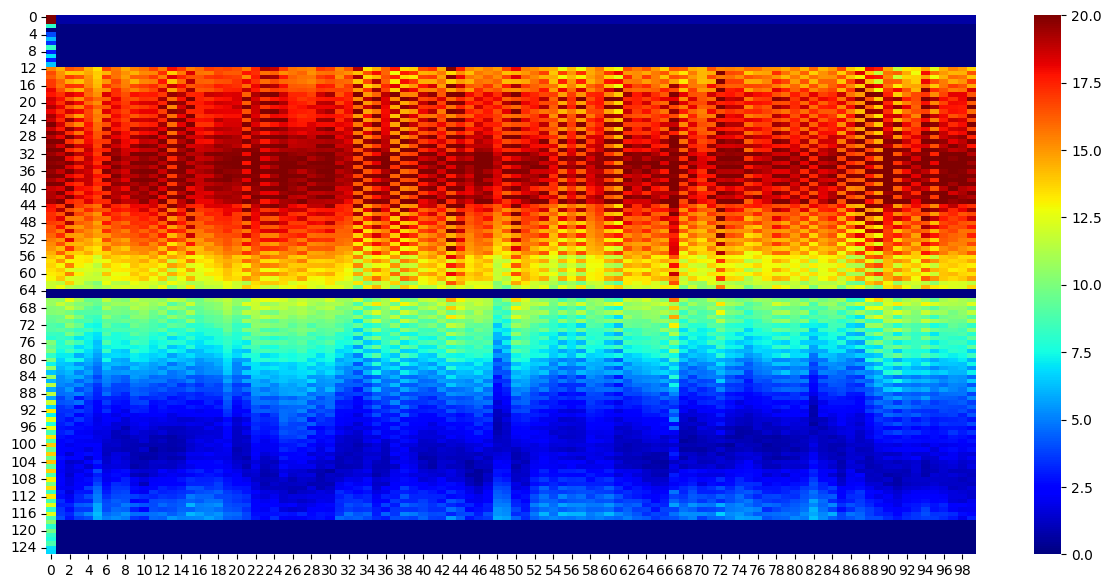

In [ ]:
# Plotting
plt.figure(figsize=(15, 7))
sn.heatmap(sd_output, cmap="jet", vmin=0, vmax=20)
plt.savefig(name + ".jpg")
plt.show()


In [ ]:
import time
import numpy as np
import pandas as pd

start_time = time.time()

sampling_range = 20
csi_mean = np.mean(csi_data, axis=1)

output = [
    [np.sqrt(np.mean([(csi_data_walk[j][k] - csi_mean[k]) ** 2 for j in range(i, i + sampling_range)])) for i in range(0, 2000, sampling_range)]
    for k in range(126)
]

sd_output = pd.DataFrame(output)

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")


Execution Time: 2.600161552429199 seconds


In [ ]:
sd_output.shape

(126, 100)

In [ ]:
sd_output

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,102.909430,0.631816,0.631816,0.631816,0.631816,0.631816,0.631816,0.631816,0.631816,0.631816,...,0.631816,0.631816,0.631816,0.631816,0.631816,0.631816,0.631816,0.631816,0.631816,0.631816
1,100.521116,0.693847,0.693847,0.693847,0.693847,0.693847,0.693847,0.693847,0.693847,0.693847,...,0.693847,0.693847,0.693847,0.693847,0.693847,0.693847,0.693847,0.693847,0.693847,0.693847
2,8.078125,0.035018,0.035018,0.035018,0.035018,0.035018,0.035018,0.035018,0.035018,0.035018,...,0.035018,0.035018,0.035018,0.035018,0.035018,0.035018,0.035018,0.035018,0.035018,0.035018
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3.975194,0.015508,0.015508,0.015508,0.015508,0.015508,0.015508,0.015508,0.015508,0.015508,...,0.015508,0.015508,0.015508,0.015508,0.015508,0.015508,0.015508,0.015508,0.015508,0.015508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,8.191681,0.022011,0.022011,0.022011,0.022011,0.022011,0.022011,0.022011,0.022011,0.022011,...,0.022011,0.022011,0.022011,0.022011,0.022011,0.022011,0.022011,0.022011,0.022011,0.022011
122,7.662408,0.038019,0.038019,0.038019,0.038019,0.038019,0.038019,0.038019,0.038019,0.038019,...,0.038019,0.038019,0.038019,0.038019,0.038019,0.038019,0.038019,0.038019,0.038019,0.038019
123,8.807699,0.025013,0.025013,0.025013,0.025013,0.025013,0.025013,0.025013,0.025013,0.025013,...,0.025013,0.025013,0.025013,0.025013,0.025013,0.025013,0.025013,0.025013,0.025013,0.025013
124,6.929143,0.034517,0.034517,0.034517,0.034517,0.034517,0.034517,0.034517,0.034517,0.034517,...,0.034517,0.034517,0.034517,0.034517,0.034517,0.034517,0.034517,0.034517,0.034517,0.034517


In [ ]:
import requests
import pandas as pd
from io import BytesIO

In [ ]:
# Convert DataFrame to CSV string
csv_data = sd_output.to_csv(index=False)

# Convert CSV string to bytes
csv_bytes = BytesIO(csv_data.encode())

# Send CSV data to FastAPI
files = {"csv_file": ("data.csv", csv_bytes)}
api_url = "https://d675-27-55-78-196.ngrok-free.app/receive_csv"
response = requests.post(api_url, files=files)

# Check the status code of the response
print(response.status_code)

# Print the response content if needed
print(response.text)

200
{"message":"CSV data received and processed successfully"}


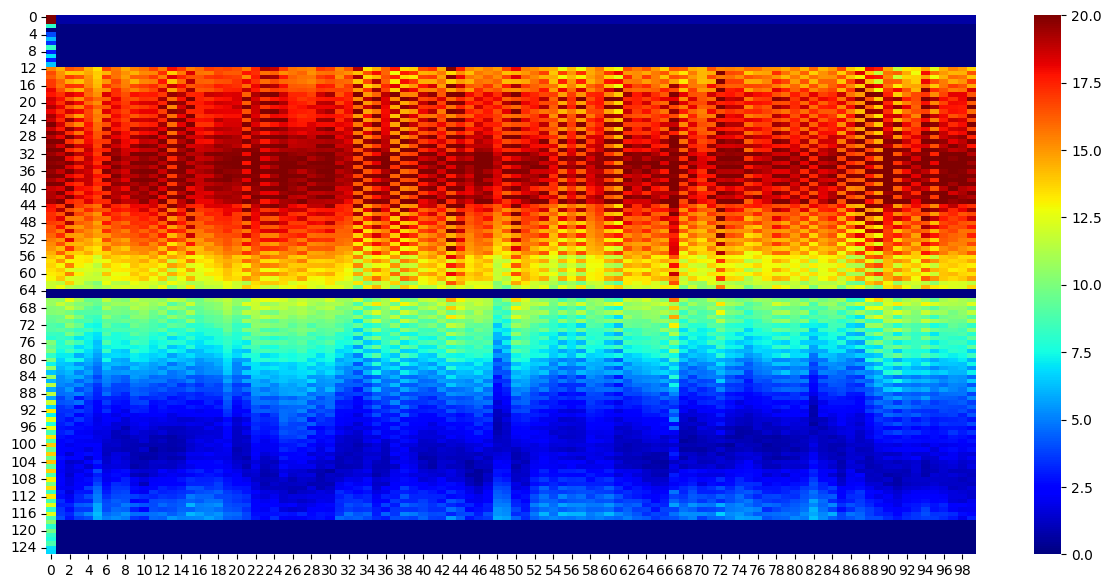

In [ ]:
# Plotting
plt.figure(figsize=(15, 7))
sn.heatmap(sd_output, cmap="jet", vmin=0, vmax=20)
plt.savefig("plot.jpg")
plt.show()


In [ ]:
!curl https://bd60-27-55-78-196.ngrok-free.app/get_data

{"data":[{"Timestamp":"2024-03-03 07:27:46","Data":"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1]]"},{"Timestamp":"2024-03-03 07:27:48","Data":"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1]]"},{"Timestamp":"2024-03-03 07:28:52","Data":"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1]]"},{"Timestamp":"2024-03-03 07:29:01","Data":"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1]]"},{"Timestamp":"2024-03-03 07:29:02","Data":"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1]]"},{"Timestamp":"2024-03-03 07:29:03","Data":"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1]]"},{"Timestamp":"2024-03-03 07:29:03","Data":"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1]]"},{"Timestamp":"2024-03-03 07:29:15","Data":"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1]]"},{"Timestamp":"2024-03-03 07:29:16","Data":"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1]]"},{"Timestamp":"2024-03-03 07:29:16","Data":"[[1, 0, 1, 0], [0, 1, 0, 1], [

In [ ]:
import pandas as pd
import json
from pandas import json_normalize

# Use curl to get the JSON data
json_data = !curl -s https://4fbc-2405-9800-b671-2af7-54ba-c2b0-542f-1287.ngrok-free.app/get_data

# Load JSON data
data_dict = json.loads(json_data[0])

data_dict['data'] = [{'Timestamp': item['Timestamp'], 'Data': item['Data']} for item in data_dict['data']]


# Use json_normalize to flatten the nested structure
df = json_normalize(data_dict['data'], sep='_')

df


,Timestamp,Data
0,2024-03-03 07:27:46,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."
1,2024-03-03 07:27:48,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."
2,2024-03-03 07:28:52,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."
3,2024-03-03 07:29:01,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."
4,2024-03-03 07:29:02,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."
5,2024-03-03 07:29:03,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."
6,2024-03-03 07:29:03,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."
7,2024-03-03 07:29:15,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."
8,2024-03-03 07:29:16,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."
9,2024-03-03 07:29:16,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."


In [ ]:
df

,Timestamp,Data
0,2024-03-03 07:27:46,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."
1,2024-03-03 07:27:48,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."
2,2024-03-03 07:28:52,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."
3,2024-03-03 07:29:01,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."
4,2024-03-03 07:29:02,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."
5,2024-03-03 07:29:03,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."
6,2024-03-03 07:29:03,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."
7,2024-03-03 07:29:15,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."
8,2024-03-03 07:29:16,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."
9,2024-03-03 07:29:16,"[[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0,..."


In [ ]:
output_reshape = output_array.reshape(output_array.shape[0], -1)
np.savetxt("csi_rxtx.csv", output_reshape)

In [ ]:
load_txrx = np.loadtxt("csi_txrx.csv")
print(load_txrx)
print(load_txrx.shape)
load_rxtx = np.loadtxt("csi_rxtx.csv")
print(load_rxtx)

[1.02913447e+02 6.30315158e-01 6.30315158e-01 ... 2.60130065e-02
 2.60130065e-02 2.60130065e-02]
(12600,)
[1.02909430e+02 6.31815908e-01 6.31815908e-01 ... 2.25112556e-02
 2.25112556e-02 2.25112556e-02]


In [ ]:
csi_txrx= load_txrx.reshape(output_array.shape[0], output_array.shape[1], output_array.shape[2])
csi_rxtx= load_rxtx.reshape(output_array.shape[0], output_array.shape[1], output_array.shape[2])

# csi_txrx= load_txrx.reshape(output_array.shape[0], output_array.shape[1])
# csi_rxtx= load_rxtx.reshape(output_array.shape[0], output_array.shape[1])

In [ ]:
csi = np.concatenate((csi_txrx, csi_rxtx),axis=0)

In [ ]:
zeros = np.zeros(30)
ones = np.ones(30)
answer = np.concatenate((zeros, ones))


# print(zeros)
# print(ones)
# print("answer:")
# print(answer)

In [ ]:
import random
permutation = np.random.permutation(len(csi))
print(permutation)
# Use the same permutation to shuffle both arrays
shuffled_csi = csi[permutation]
shuffled_answer = answer[permutation]

[0 1]


In [ ]:
x_train = shuffled_csi[:50]

print(x_train)

x_test = shuffled_csi[50:60]

print(x_test)

y_train = shuffled_answer[:50]
y_test = shuffled_answer[50:60]

[[[1.02913447e+02 6.30315158e-01 6.30315158e-01 ... 6.30315158e-01
   6.30315158e-01 6.30315158e-01]
  [1.02006501e+02 7.33366683e-01 7.33366683e-01 ... 7.33366683e-01
   7.33366683e-01 7.33366683e-01]
  [8.92038423e+00 4.35217609e-02 4.35217609e-02 ... 4.35217609e-02
   4.35217609e-02 4.35217609e-02]
  ...
  [1.02424931e+01 3.10155078e-02 3.10155078e-02 ... 3.10155078e-02
   3.10155078e-02 3.10155078e-02]
  [1.49226254e+01 3.65182591e-02 3.65182591e-02 ... 3.65182591e-02
   3.65182591e-02 3.65182591e-02]
  [1.00082670e+01 2.60130065e-02 2.60130065e-02 ... 2.60130065e-02
   2.60130065e-02 2.60130065e-02]]

 [[1.02909430e+02 6.31815908e-01 6.31815908e-01 ... 6.31815908e-01
   6.31815908e-01 6.31815908e-01]
  [1.00521116e+02 6.93846923e-01 6.93846923e-01 ... 6.93846923e-01
   6.93846923e-01 6.93846923e-01]
  [8.07812501e+00 3.50175088e-02 3.50175088e-02 ... 3.50175088e-02
   3.50175088e-02 3.50175088e-02]
  ...
  [8.80769908e+00 2.50125063e-02 2.50125063e-02 ... 2.50125063e-02
   2.50125

In [ ]:
# Original
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

print("x_train:")
print(x_train)
print()
print("x_test:")
print(x_test)
# x_train = x_train.reshape(-1, 126, 100)
# x_test = x_test.reshape(-1, 126, 100)


ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(126, 100)),
    keras.layers.Dense(8, activation='sigmoid'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.3701 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 45ms/step - loss: 0.1388 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 42ms/step - loss: 0.0763 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 46ms/step - loss: 0.0576 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 39ms/step - loss: 0.0505 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 29ms/step - loss: 0.0471 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 22ms/step - loss: 0.0452 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 17ms/step - loss: 0.0440 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 14ms/step - loss: 0.0431 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 12ms/step - loss: 0.0424 - accuracy: 1.0000


In [ ]:
model.evaluate(x_test,y_test)

ValueError: Expected input data to be non-empty.